In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Downloads/social_media_usage.csv')

In [6]:
df.head()

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21


In [8]:
df.isnull().sum()

User_ID                0
App                    0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64

In [12]:
df.shape

(1000, 6)

In [14]:
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              1000 non-null   object
 1   App                  1000 non-null   object
 2   Daily_Minutes_Spent  1000 non-null   int64 
 3   Posts_Per_Day        1000 non-null   int64 
 4   Likes_Per_Day        1000 non-null   int64 
 5   Follows_Per_Day      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [18]:
df.describe()

,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,247.368000,10.269000,94.682000,24.698000
std,146.371921,6.121774,57.560943,14.842948
min,5.000000,0.000000,0.000000,0.000000
25%,112.750000,5.000000,44.750000,12.000000
50%,246.000000,10.000000,94.000000,24.000000
75%,380.500000,16.000000,142.000000,38.000000
max,500.000000,20.000000,200.000000,50.000000


<Axes: xlabel='Daily_Minutes_Spent', ylabel='Count'>

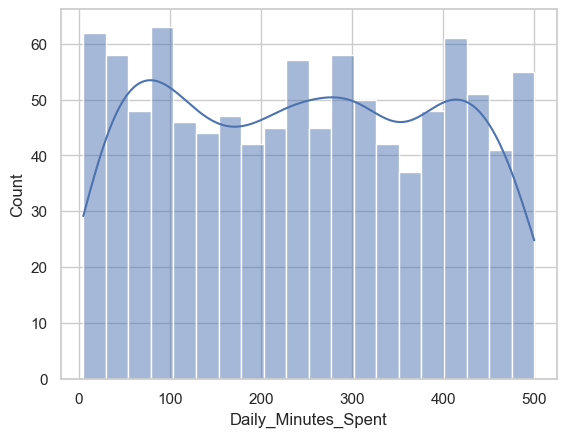

In [25]:
sns.histplot(df['Daily_Minutes_Spent'],kde=True,bins=20)

<Axes: xlabel='Posts_Per_Day', ylabel='Count'>

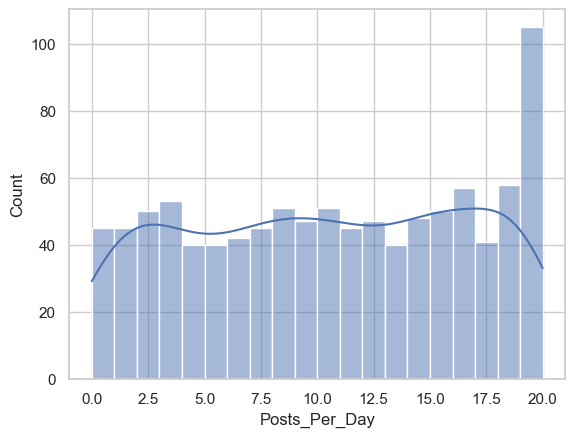

In [27]:
sns.histplot(df['Posts_Per_Day'],kde=True,bins=20)

<Axes: xlabel='Likes_Per_Day', ylabel='Count'>

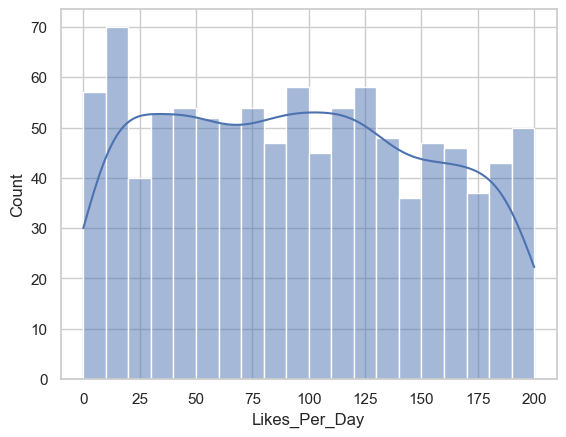

In [29]:
sns.histplot(df['Likes_Per_Day'],kde=True,bins=20)

<Axes: xlabel='Follows_Per_Day', ylabel='Count'>

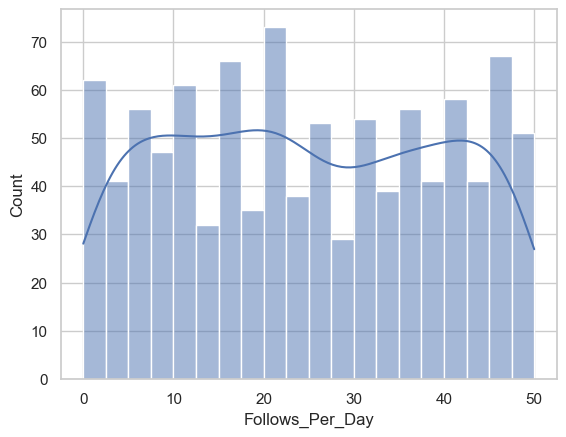

In [31]:
sns.histplot(df['Follows_Per_Day'],kde=True,bins=20)

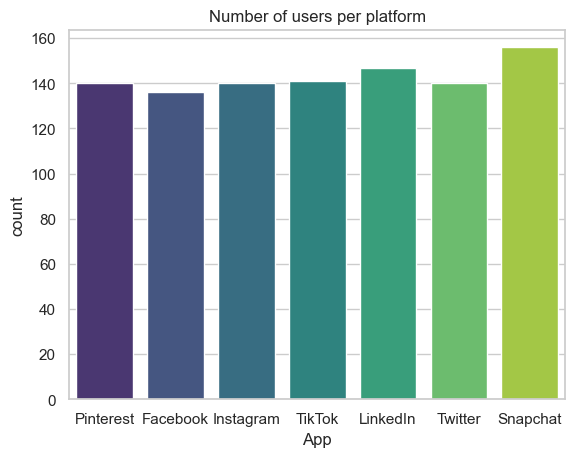

App Daily_Minutes_Spent        Posts_Per_Day        Likes_Per_Day  \
                            mean median          mean median          mean   
0   Facebook          247.169118  226.0      9.522059    9.0     99.301471   
1  Instagram          264.100000  278.5     11.328571   12.0     98.992857   
2   LinkedIn          236.054422  229.0     10.176871   10.0     97.081633   
3  Pinterest          236.207143  248.5     10.628571   11.0     92.114286   
4   Snapchat          256.551282  274.5     10.000000    9.5     93.820513   
5     TikTok          233.418440  219.0      9.560284    9.0     91.411348   
6    Twitter          257.685714  276.5     10.685714   11.0     90.185714   

         Follows_Per_Day         
  median            mean median  
0  102.0       23.117647   21.0  
1   96.0       25.864286   27.0  
2   89.0       25.081633   24.0  
3   94.0       24.792857   25.0  
4   92.5       25.506410   26.5  
5   90.0       24.439716   23.0  
6   82.5       23.928571   25.0

In [51]:
# Count the number of users for each platform
platform_counts=df['App'].value_counts()
sns.countplot(x='App',data=df,palette='viridis')
plt.title('Number of users per platform')
plt.show()

# Show platform-wise statistics for daily time spent, posts, likes, follows
platform_summary=df.groupby('App').agg({
    'Daily_Minutes_Spent':['mean','median'],
    'Posts_Per_Day':['mean','median'],
    'Likes_Per_Day':['mean','median'],
    'Follows_Per_Day':['mean','median']
}).reset_index()
platform_summary

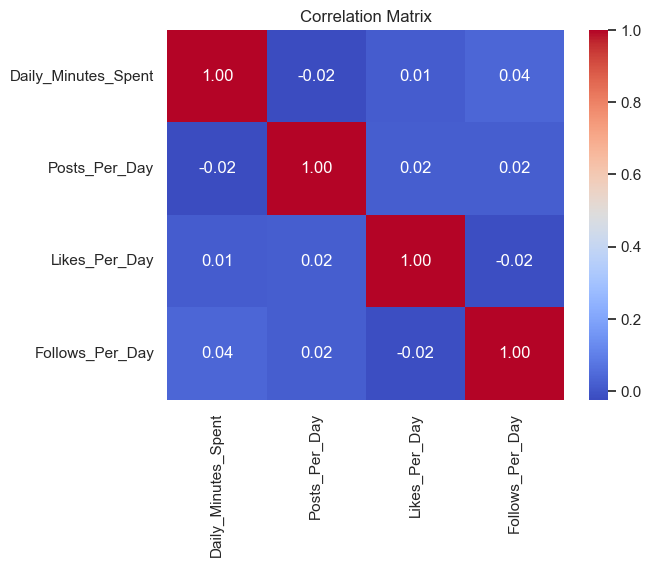

In [58]:
#Correlation Analysis
corr_matrix=df[['Daily_Minutes_Spent','Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']].corr()

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [62]:
#Feature Engineering
df['Likes_to_Post_Ratio']=df['Likes_Per_Day']/df['Posts_Per_Day']
df['Time_to_Post_Ratio']=df['Daily_Minutes_Spent']/df['Posts_Per_Day']

df.fillna(0,inplace=True)

df[['User_ID','Likes_to_Post_Ratio','Time_to_Post_Ratio']].head()

,User_ID,Likes_to_Post_Ratio,Time_to_Post_Ratio
0,U_1,5.875000,18.000000
1,U_2,8.357143,13.714286
2,U_3,9.230769,27.000000
3,U_4,5.850000,1.050000
4,U_5,0.562500,15.062500
